# Car Price Analysis

The purpose of this analysis is to check if in fact car prices will appreciate for over **`100%`**. More specifically, I want to extract relevant `car make` and `car models` that has the potential to appreciate over **`100%`**. 

Car Price analysis has been extracted from 'EthioCarMarket' and 'BisreCarPrice' telegram pages.
All data has been cleaned and ready for analysis using the below code.

## code for cleaning data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Thu Sep 22 18:03:32 2022

@author: socrates
"""

import pandas as pd


json_file_1 = "Ethio_Car_Market.json"
json_file_2 = "Bisre_Car_Market.json"
df_e = pd.read_json(json_file_1)
df_b = pd.read_json(json_file_2)

e_msg = df_e[["date","message"]][df_e["message"]!='']

b_msg = df_b[["date","message"]][df_b["message"]!='']

e_msg.dropna(inplace = True)
b_msg.dropna(inplace = True)
e_msg.reset_index(inplace = True, drop = True)
b_msg.reset_index(inplace = True, drop = True)
msg = pd.concat([e_msg,b_msg]).reset_index(drop = True)
msg.drop_duplicates(subset = "date", inplace = True)
msg.sort_values("date")

msg["message"] = msg["message"].apply(lambda x: x.lower().split())


msg["len"] = msg["message"].apply(lambda x:len(x))
msg = msg[msg["len"]>4]


def makeId(x,clm):
    """
    defines make column 
    """
    num = 0
    for n, i in enumerate(x):
        if clm in i:
            num = n
    if clm in x[num]:
        ret = x[num][x[num].find(":")+1:]
        if ret.isalnum() and ret != clm:
            return ret
        else:
            return ""
    else:
        return ""

def makeClmn(x,lst_id):
    found = False
    for i in lst_id:
        for k in x:
            if i in k:
                found = True
                return i
            else:
                continue
    if not found:
        return ""

def create_cols(col_lst,col_names):
    for n, i in enumerate(col_lst):
        msg[i + "_id"] = msg["message"].apply(lambda x:makeId(x,i))
        cid = list(msg[i + "_id"].unique())
        cid.remove("")
        
        msg[col_names[n]] = msg["message"].apply(lambda x:makeClmn(x,cid))
        
def has_numbers(inputString):
    return any(char.isdigit() for char in inputString) 

def extract_numbers(inputString):
    if type(inputString) is str:
        number = "".join([char for char in inputString if char.isdigit()])
        if number!='፪' and (number[:3] != '251') and (number[0]!=0):
            return int(number)
        else:
            return 0

def price_col(x):
    price = 0
    for i in x:
        if has_numbers(i):
            num = extract_numbers(i)
            if (num >= 800_000) and (num <= 6_000_000):
                price = num
                break
    return price



create_cols(["make","model","year"],["make","model","model_year"])

mask = (msg["make"]!="") & (msg["model"]!="") & (msg["model_year"]!="")

msg_msk = msg[mask]

msg_msk["price"] = msg["message"].apply(lambda x: price_col(x))

fmsg = msg_msk[msg_msk["price"]!=0][["date","make","model","model_year","price"]]
fmsg = fmsg.set_index("date")

## Results for the data cleaning

### Size of data before cleaning

In [3]:
msg.shape[0]

8290

### Size of data after cleaning

The size of data has been reduced since most of the data are either advertizments, other announcments like `item being sold` and some informations missing like `make` or `model`, `model_year` or `price`

In [4]:
size_of_data_used_for_anaysis = fmsg.shape[0]
print(size_of_data_used_for_anaysis)

3230


so a total of `3230` data points has been used for this analysis

### High Level overview of the data

#### Data column information

In [5]:
fmsg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3230 entries, 2022-09-22 12:50:05+00:00 to 2018-09-24 15:23:55+00:00
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   make        3230 non-null   object
 1   model       3230 non-null   object
 2   model_year  3230 non-null   object
 3   price       3230 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 126.2+ KB


#### First five rows of the data

In [6]:
fmsg.head()

,make,model,model_year,price
date,,,,
2022-09-22 12:50:05+00:00,peugeot,5008,2022,6000000
2022-09-22 10:00:10+00:00,hyundai,grand,2020,4050000
2022-09-22 09:46:44+00:00,toyota,rush,2021,4700000
2022-09-22 09:40:38+00:00,hyundai,bayon,2022,3650000
2022-09-22 09:09:31+00:00,hyundai,tucson,2022,5500000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

## Analysis

### prices

#### Top 15 car prices

In [8]:
fmsg.sort_values("price",ascending = False).head(15)

,make,model,model_year,price
date,,,,
2022-09-22 12:50:05+00:00,peugeot,5008,2022,6000000
2022-06-16 13:07:04+00:00,toyota,corolla,2022,6000000
2022-06-22 17:24:20+00:00,toyota,land,2008,6000000
2022-08-27 11:37:43+00:00,toyota,rav4,2018,6000000
2022-06-10 17:04:42+00:00,toyota,hilux,2022,6000000
2022-04-15 15:54:29+00:00,hyundai,tucson,2022,6000000
2020-12-31 12:52:22+00:00,toyota,land,2016,6000000
2022-06-24 07:54:00+00:00,toyota,hilux,2022,6000000
2022-09-16 10:12:50+00:00,peugeot,5008,2022,6000000


#### Averege car prices trend over the years

This is just an average of prices for all car prices into one.

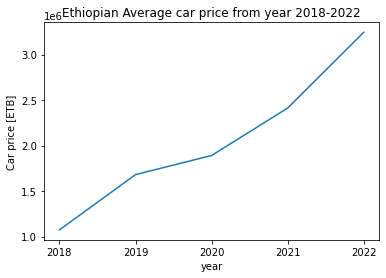

In [9]:
data = fmsg.groupby(fmsg.index.year)["price"].mean()
ax = sns.lineplot(x = data.index, y = data)
ax.locator_params(integer=True)
plt.xlabel("year")
plt.ylabel("Car price [ETB]")
plt.title("Ethiopian Average car price from year 2018-2022");

In [10]:
overall_appreciation = round(((data[2022] - data[2018]) / data[2018])*100,2)
overall_appreciation

202.31

so the overall appreciation of cars has been about **`202.31%`** over the past **4** years

In [11]:
year = data.index[1:]
yoy_growth = [round(((data[x]-data[x-1])/data[x-1])*100,2) for x in year]
yoy_growth

[56.61, 12.48, 27.59, 34.51]

In [12]:
#Average year on year growth
round(sum(yoy_growth) / len(yoy_growth),2)

32.8

However, Average year on year growth is about **`32.8%`** which means that on a high level, buying a car will not be very interseting to invest as year on year growth is expected to be **`100%`**. Let us however delve deeper into the types of car models to see if some cars might be lucrative

#### Top 5 brands with high percentage increase for every year

In [13]:
import numpy as np
fmsg["brand"] = fmsg["make"] + ":" + fmsg["model"]
brand = fmsg["brand"].unique()
bp = fmsg.groupby([fmsg.index.year,"brand"])["price"].mean().reset_index()
bp["check"] = bp.apply(lambda x: 
                       (bp[(bp["date"]==x["date"]) & (bp["brand"]==x["brand"])]["price"].values
                       -
                       bp[(bp["date"]==x["date"]-1) & (bp["brand"]==x["brand"])]["price"].values)
                       /
                       bp[(bp["date"]==x["date"]-1) & (bp["brand"]==x["brand"])]["price"].values 
                       
                       , axis  = 1 )
bp["pct_change"] = bp["check"].apply(lambda x: x[0]*100 if len(x)!=0 else np.nan)
bp.dropna(inplace = True)
bp.drop(["check"],axis = 1, inplace = True)
b_data = pd.concat([bp[bp["date"]==x].sort_values("pct_change",ascending = False).head() for x in [2019,2020,2021,2022]]).sort_values(["date","pct_change"],ascending = False)
b_data

,date,brand,price,pct_change
317,2022,mercedes:cla,2.350000e+06,161.111111
264,2022,chevrolet:v,4.300000e+06,160.606061
361,2022,toyota:corolla,2.876833e+06,109.640057
272,2022,ford:f150,3.633333e+06,70.980392
254,2022,audi:v,4.100000e+06,66.936887
212,2021,peugeot:2008,3.425000e+06,280.555556
191,2021,mercedes:c180,4.400000e+06,193.333333
146,2021,audi:v,2.456018e+06,172.890889
170,2021,hyundai:h1,3.025000e+06,163.043478
194,2021,mercedes:v,1.966667e+06,131.372549


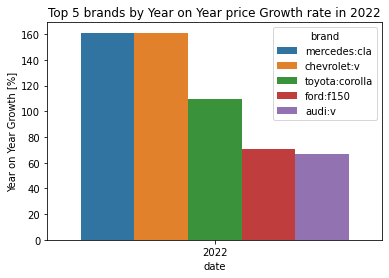

In [14]:
sns.barplot(data = b_data[b_data["date"]==2022].head(), x = "date", y = "pct_change", hue = "brand")
plt.xlabel("date")
plt.ylabel("Year on Year Growth [%]")
plt.title("Top 5 brands by Year on Year price Growth rate in 2022");

In [15]:
print("percent of cars greater than 100% growth rate in 2022:",
      round(bp[(bp["date"]==2022) & (bp["pct_change"]>=100)].shape[0]/bp[(bp["date"]==2022)].shape[0]*100,2))

bp[bp["date"]==2022].describe()["pct_change"]

percent of cars greater than 100% growth rate in 2022: 3.8


count     79.000000
mean      20.373805
std       36.165880
min      -62.750850
25%        4.878448
50%       20.155039
75%       30.720148
max      161.111111
Name: pct_change, dtype: float64

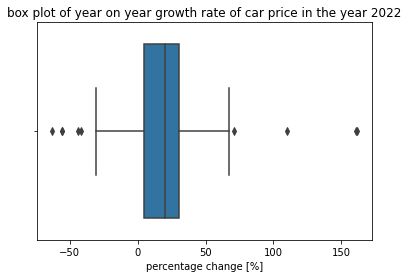

In [16]:
sns.boxplot(bp[bp["date"]==2022]["pct_change"])
plt.title("box plot of year on year growth rate of car price in the year 2022")
plt.xlabel("percentage change [%]");

so it is possible that some cars like the `chevrolet:v` brands can go up to `160%` while there are some brands like `toyota:yaris` to increase by only `27%`. 

So, the first thing to note is that there are some cars that might increase to above `100%` while others might not. In fact in 2022, only `3.8%` of the car brands has a probability of going up `100%`. In 2022, we can also see that `75%` of the car brands fall on or under `30%`. So assuming I blindly chose a car at random, I would have a `75%` chance of getting a car that will appreciate under `30%`. Doubling car prices is an outlier as can be seen by the box plot. So, in conclusion, it would be very risky to bet that a car price might double. 




#### Analysis within my price range

Now, what about cars under two million birr. We can see below that only two brands fit my description `ford` in `2020` and `mercedes` in `2021`

In [17]:
my_bp = bp[(bp["price"]<=2_000_000) & (bp["pct_change"]>=100)]
my_bp

,date,brand,price,pct_change
67,2020,ford:ranger,1.986667e+06,125.757576
194,2021,mercedes:v,1.966667e+06,131.372549


We can see below that for the `ford` the price has gone up to about `3.4 million` with an average annual growth rate of about `62.8%`. It would have been nice if I bought it in 2020, but now its beyond my pay grade

In [18]:
bp_ford = bp[bp["brand"]=="ford:ranger"]
print("average ford percent increase: ", round(sum(bp_ford["pct_change"])/len(bp_ford["pct_change"]),2))
bp_ford

average ford percent increase:  62.68


,date,brand,price,pct_change
67,2020,ford:ranger,1.986667e+06,125.757576
158,2021,ford:ranger,2.722222e+06,37.024609
274,2022,ford:ranger,3.410000e+06,25.265306


In [19]:
bp_merc = bp[bp["brand"]=="mercedes:v"]
print("average ford percent increase: ", round(sum(bp_merc["pct_change"])/len(bp_ford["pct_change"]),2))
bp_merc

average ford percent increase:  47.26


,date,brand,price,pct_change
194,2021,mercedes:v,1.966667e+06,131.372549
322,2022,mercedes:v,2.171429e+06,10.411622


#### Affordable cars in 2022

In [20]:
af_bp = bp[(bp["price"]<=4_000_000) & (bp["date"]>=2022)]
af_bp.sort_values("pct_change",ascending = False)

,date,brand,price,pct_change
317,2022,mercedes:cla,2.350000e+06,161.111111
361,2022,toyota:corolla,2.876833e+06,109.640057
272,2022,ford:f150,3.633333e+06,70.980392
330,2022,nissan:juke,3.260357e+06,57.559544
352,2022,toyota:2008,2.600000e+06,55.746911
...,...,...,...,...
312,2022,lexus:lexus,1.950000e+06,-41.791045
315,2022,mercedes:c180,2.466667e+06,-43.939394
358,2022,toyota:5008,1.202021e+06,-55.508182
316,2022,mercedes:c200,8.000000e+05,-55.555556


In [21]:
af_bp.describe()["pct_change"]

count     62.000000
mean      16.814734
std       35.500854
min      -62.750850
25%        0.959368
50%       16.035969
75%       30.312520
max      161.111111
Name: pct_change, dtype: float64

We can see in 2022, 75% of cars sampled appreciated by about `25%` with a maximum appreciation of only `42.3%` indicating that based on the 2 million budget, it would be difficult to expect doubling car prices

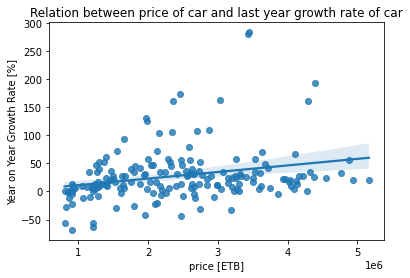

In [22]:
sns.regplot(data = bp,x="price",y="pct_change", label = "brand")
plt.xlabel("price [ETB]")
plt.ylabel("Year on Year Growth Rate [%]")
plt.title("Relation between price of car and last year growth rate of car");

### Conclusion

On a final note, we can see that cars with low price values does imply that they have depreciated from last year and that more expensive cars show that they have appreciated from last year which does make logical sense; But the graph does also show that the line is very close to a horizontal line around 20-30% which is consistent with other conclusions. So, even though buying cars worth 2 million might have some chances of cashing out big, the probability is really stacked against you. So, for very lucrative returns, buying a car might not be a best venture.

In [25]:
fmsg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3230 entries, 2022-09-22 12:50:05+00:00 to 2018-09-24 15:23:55+00:00
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   make        3230 non-null   object
 1   model       3230 non-null   object
 2   model_year  3230 non-null   object
 3   price       3230 non-null   int64 
 4   brand       3230 non-null   object
dtypes: int64(1), object(4)
memory usage: 151.4+ KB


In [31]:
rp = fmsg[(fmsg.index.year == 2022) & ((fmsg.index.month<=9) & (fmsg.index.month>=7))]
rp

,make,model,model_year,price,brand
date,,,,,
2022-09-22 12:50:05+00:00,peugeot,5008,2022,6000000,peugeot:5008
2022-09-22 10:00:10+00:00,hyundai,grand,2020,4050000,hyundai:grand
2022-09-22 09:46:44+00:00,toyota,rush,2021,4700000,toyota:rush
2022-09-22 09:40:38+00:00,hyundai,bayon,2022,3650000,hyundai:bayon
2022-09-22 09:09:31+00:00,hyundai,tucson,2022,5500000,hyundai:tucson
...,...,...,...,...,...
2022-07-04 06:33:37+00:00,hyundai,elantra,2017,2500000,hyundai:elantra
2022-07-04 06:31:00+00:00,suzuki,swift,2022,1610000,suzuki:swift
2022-07-03 07:50:46+00:00,toyota,rush,2022,3850000,toyota:rush


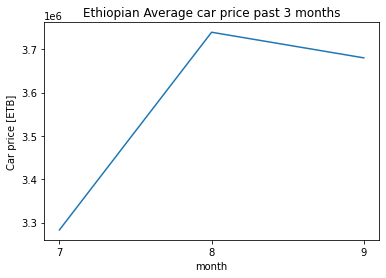

In [34]:
data = rp.groupby(rp.index.month)["price"].mean()
ax = sns.lineplot(x = data.index, y = data)
ax.locator_params(integer=True)
plt.xlabel("month")
plt.ylabel("Car price [ETB]")
plt.title("Ethiopian Average car price past 3 months");

In [35]:
overall_appreciation = round(((data[9] - data[7]) / data[7])*100,2)
overall_appreciation

12.1

In [36]:
data

date
7    3.282939e+06
8    3.739349e+06
9    3.680208e+06
Name: price, dtype: float64

In [38]:
overall_appreciation = round(((data[8] - data[7]) / data[7])*100,2)
overall_appreciation

13.9

In [39]:
bp.shape

(179, 4)

In [40]:
rp.shape

(667, 5)

In [53]:
rp["brand"] = rp["make"] + ":" + rp["model"]
brand = rp["brand"].unique()
rbp = rp.groupby([rp.index.month,"brand"])["price"].mean().reset_index()
rbp["check"] = rbp.apply(lambda x: 
                       (rbp[(rbp["date"]==x["date"]) & (rbp["brand"]==x["brand"])]["price"].values
                       -
                       rbp[(rbp["date"]==x["date"]-1) & (rbp["brand"]==x["brand"])]["price"].values)
                       /
                       rbp[(rbp["date"]==x["date"]-1) & (rbp["brand"]==x["brand"])]["price"].values 
                       
                       , axis  = 1 )
rbp["pct_change"] = rbp["check"].apply(lambda x: x[0]*100 if len(x)!=0 else np.nan)
rbp.dropna(inplace = True)
rb_data = pd.concat([rbp[rbp["date"]==x].sort_values("pct_change",ascending = False).head() for x in [7,8,9]]).sort_values(["date","pct_change"],ascending = False)
rb_data

,date,brand,price,check,pct_change
139,9,mercedes:c180,3.100000e+06,[0.4090909090909091],40.909091
129,9,ford:v,4.250000e+06,[0.3229571984435798],32.295720
145,9,suzuki:dzire,1.884000e+06,[0.29218106995884774],29.218107
140,9,mitsubishi:attrage,2.276667e+06,[0.28625235404896415],28.625235
120,9,bmw:v,2.200000e+06,[0.2222222222222222],22.222222
89,8,mercedes:c180,2.200000e+06,[1.2],120.000000
80,8,hyundai:grand,3.641667e+06,[0.5279720279720278],52.797203
112,8,toyota:range,5.900000e+06,[0.44607843137254904],44.607843
106,8,toyota:hiace,4.600000e+06,[0.4397496087636933],43.974961
99,8,suzuki:v,1.150000e+06,[0.35294117647058826],35.294118
